# Hierarchical clustering

## Implementando hierarchical clustering

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

### Preraparando los datos de prueba

In [2]:
# Generate data
X, y, c = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42, cluster_std=0.8, return_centers=True)

# Dataframe
df = pd.DataFrame(
    {
        'x1' : X[:,0],
        'x2' : X[:,1],
        'y' : y
    }
)

df.head()

,x1,x2,y
0,-7.918909,6.760982,3
1,-9.037137,-6.923545,2
2,6.391721,1.326531,1
3,-2.822884,7.843474,0
4,-5.918656,-7.206570,2


In [3]:
# Dataframe centers
df_centers = pd.DataFrame(
    {
        'x1' : c[:,0],
        'x2' : c[:,1],
    }
)

df_centers

,x1,x2
0,-2.509198,9.014286
1,4.639879,1.973170
2,-6.879627,-6.880110
3,-8.838328,7.323523


### Visualización de datos

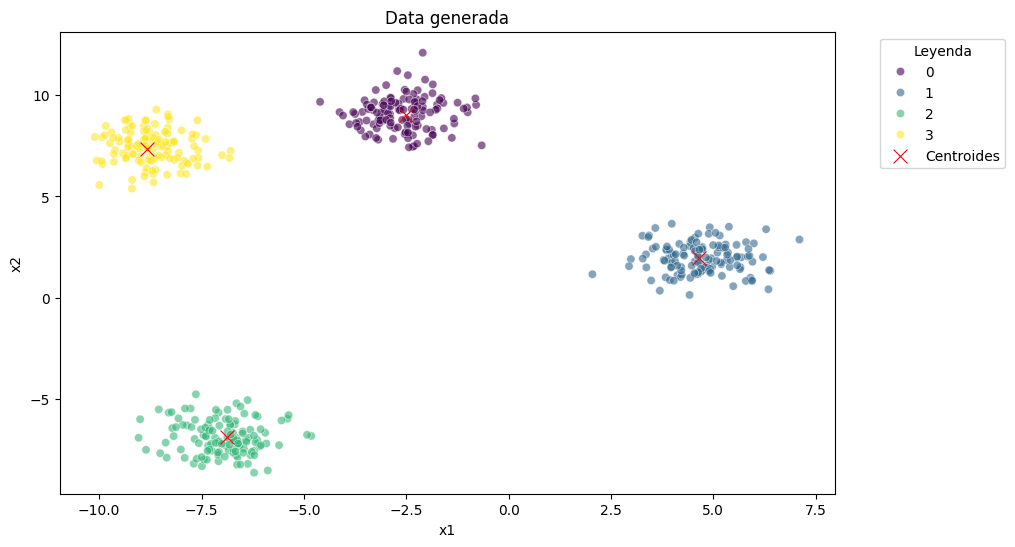

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue=y, data=df, palette='viridis', alpha=0.6)
sns.scatterplot(x='x1', y='x2', data=df_centers, color='red', s=100, marker='x', label='Centroides')
plt.title('Data generada')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Dendrograma y cluster herarquico

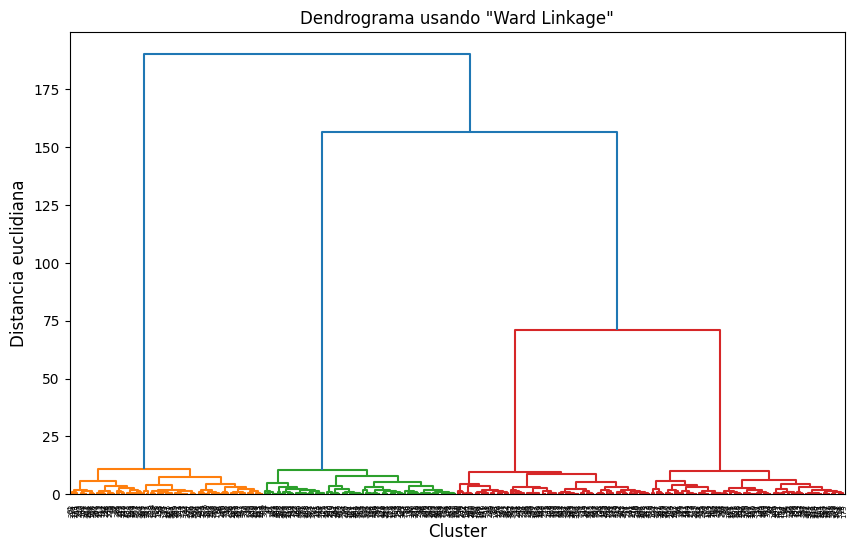

In [5]:
plt.figure(figsize=(10, 6))
dendrogram.plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando "Ward Linkage"')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia euclidiana', fontsize=12)
plt.show()

In [6]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(X)

In [7]:
df['y_pred'] = y_pred
df.head()

,x1,x2,y,y_pred
0,-7.918909,6.760982,3,1
1,-9.037137,-6.923545,2,0
2,6.391721,1.326531,1,2
3,-2.822884,7.843474,0,3
4,-5.918656,-7.206570,2,0


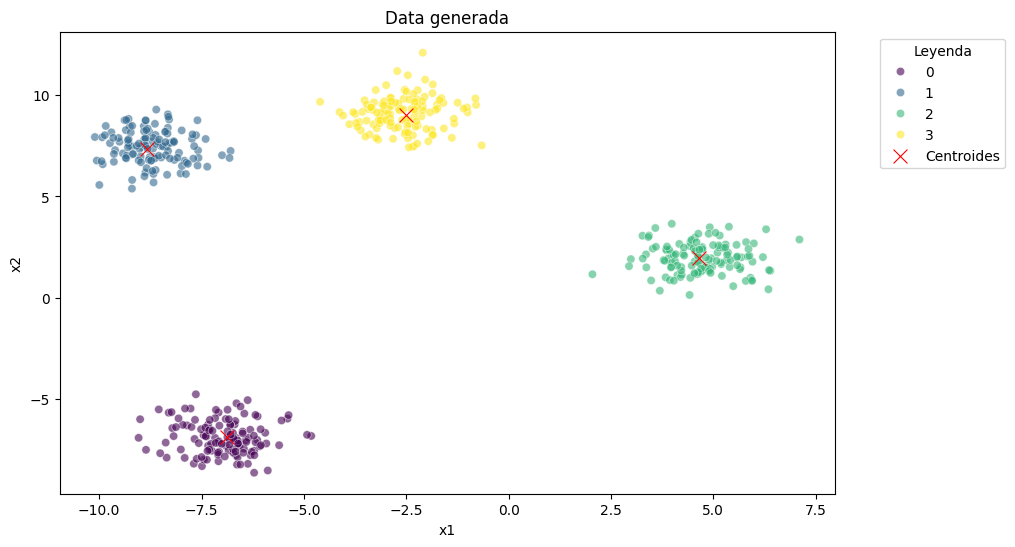

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x1', y='x2', hue=y_pred, data=df, palette='viridis', alpha=0.6)
sns.scatterplot(x='x1', y='x2', data=df_centers, color='red', s=100, marker='x', label='Centroides')
plt.title('Data generada')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Evaluando resultados de hierarchical clustering

In [9]:
# Silhouette Score
round(silhouette_score(X, y_pred),2)

0.83

Para n_clusters = 3 El promedio de silhouette_score es : 0.7819189406141627
Para n_clusters = 4 El promedio de silhouette_score es : 0.8336135403234282
Para n_clusters = 5 El promedio de silhouette_score es : 0.6976987225566063


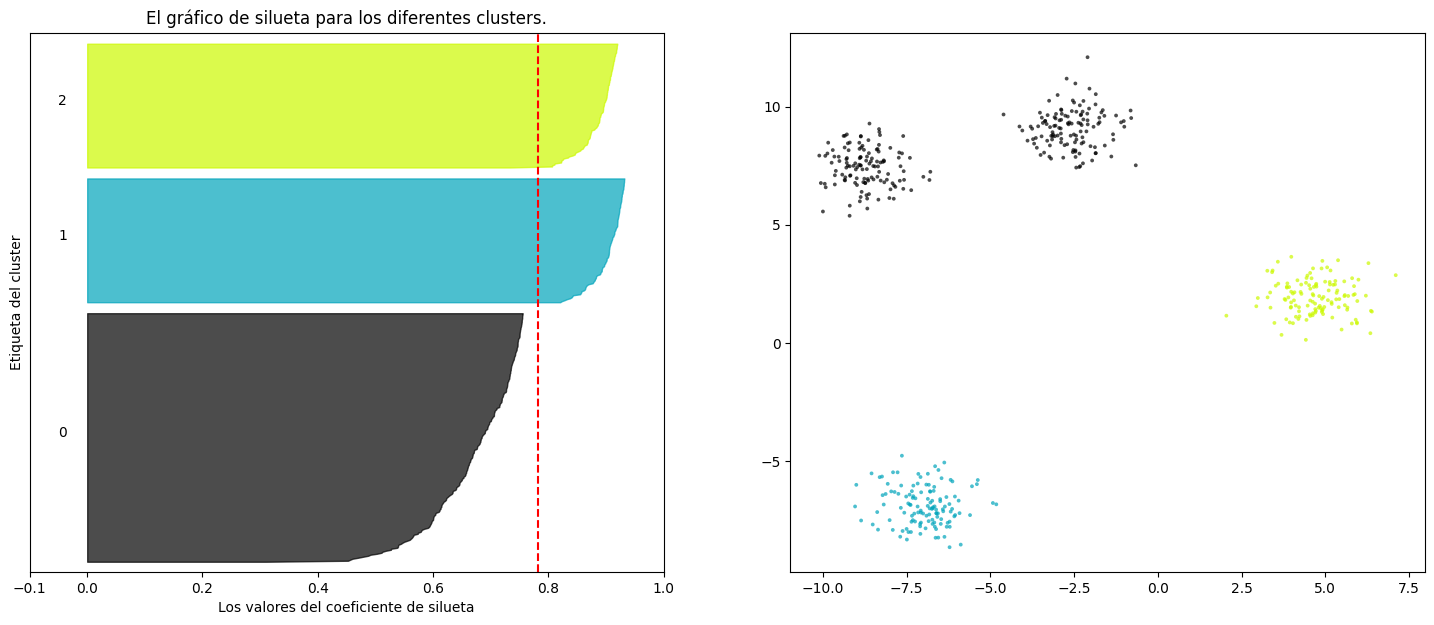

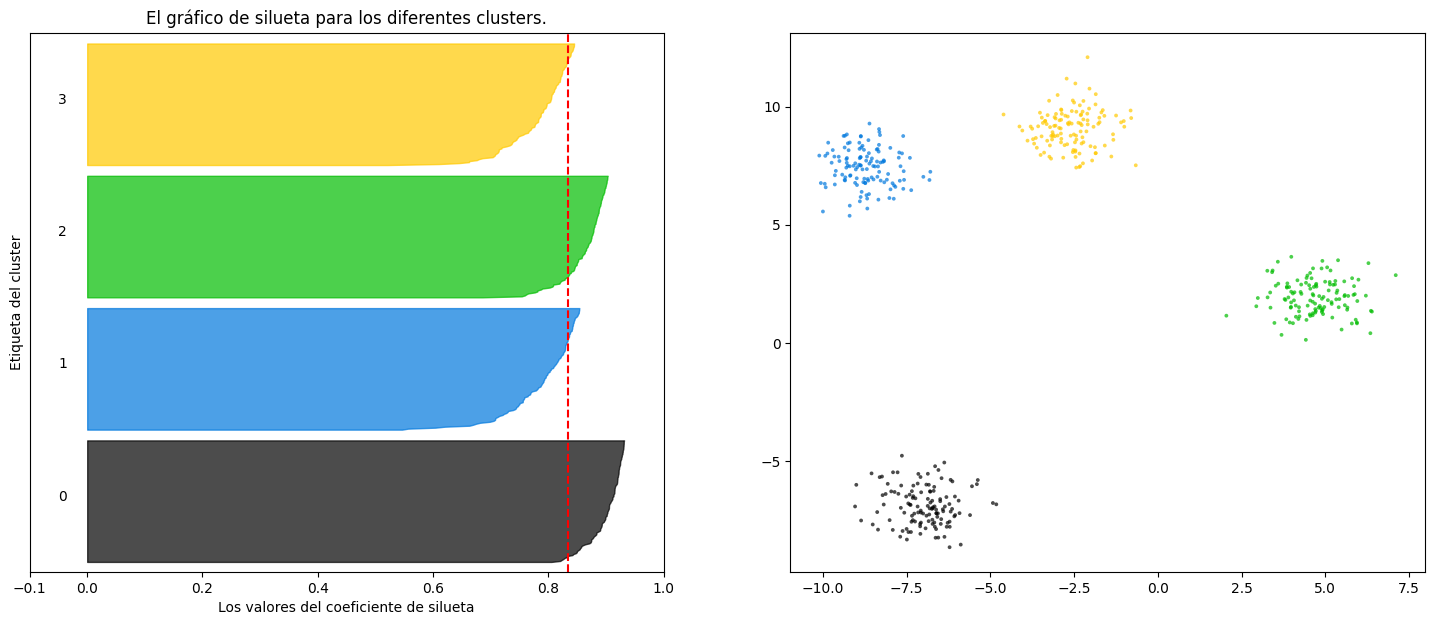

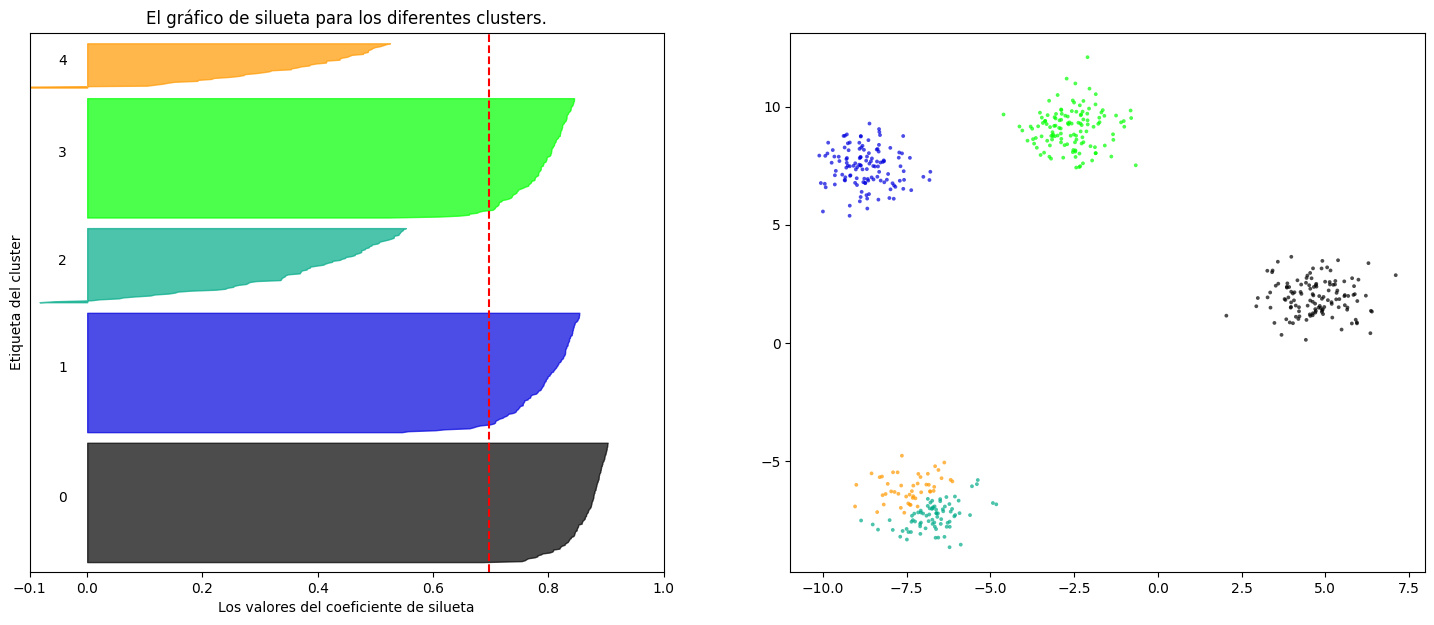

In [10]:
# Generando los datos de muestra desde make_blobs
# Esta configuración particular tiene un cluster distinto y 3 clusters colocados cerca
# uno del otro.

range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Crear un subplot con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El primer subplot es el gráfico de silueta
    # El coeficiente de silueta puede variar de -1 a 1 pero en este ejemplo todos
    # están dentro de [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # El (n_clusters+1)*10 es para insertar espacio en blanco entre las siluetas
    # gráficos de clusters individuales, para demarcarlos claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar el clusterer con n_clusters valor y un generador de semillas aleatorio
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # El silhouette_score da el valor promedio para todas las muestras.
    # Esto da una perspectiva de la densidad y separación de los clusters formados
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "El promedio de silhouette_score es :",
        silhouette_avg,
    )

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar los valores de silueta para las muestras pertenecientes a
        # cluster i, y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Etiquetar los gráficos de silueta con sus números de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo y_lower para el próximo gráfico
        y_lower = y_upper + 10  # 10 para las 0 muestras

    ax1.set_title("El gráfico de silueta para los diferentes clusters.")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    # La línea vertical para el promedio de la puntuación de silueta de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Borrar las etiquetas / ticks del eje y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2do Gráfico mostrando los clusters reales formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
plt.show()